✅ Combined results saved to summary_fd001.csv


C:\Users\OWN\AppData\Local\Temp\ipykernel_18868\1128364395.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat(


,Model,Unnamed: 0,RMSE_test,MAE_test,R2_test,RMSE_val,MAE_val,R2_val
0,0,Linear Regression,38.840000,29.190000,0.596000,NaN,NaN,NaN
1,1,Random Forest,36.960000,26.010000,0.634000,NaN,NaN,NaN
2,2,XGBoost,36.680000,25.750000,0.640000,NaN,NaN,NaN
3,LSTM,NaN,13.862244,10.240235,0.880338,12.514089,9.125415,0.910761
4,GRU,NaN,15.653031,11.361568,0.847424,4.922744,3.364418,0.986191
5,CNN-LSTM,NaN,40.376512,35.211090,-0.015191,41.905533,37.306297,-0.000694
6,Transformer,NaN,20.490286,15.402003,0.738551,5.203080,4.208179,0.984573


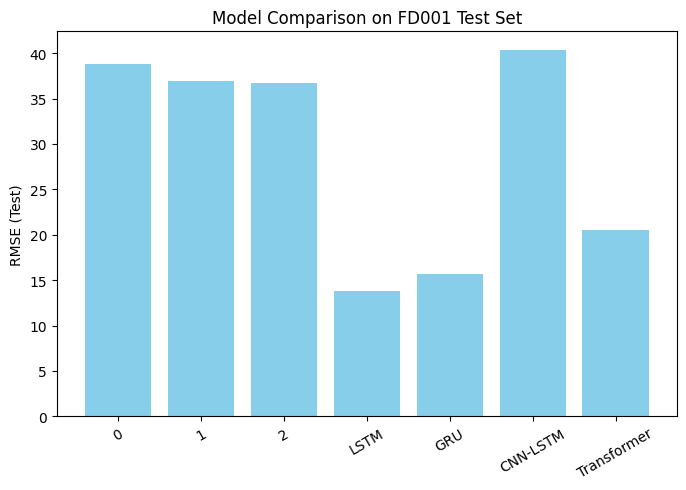

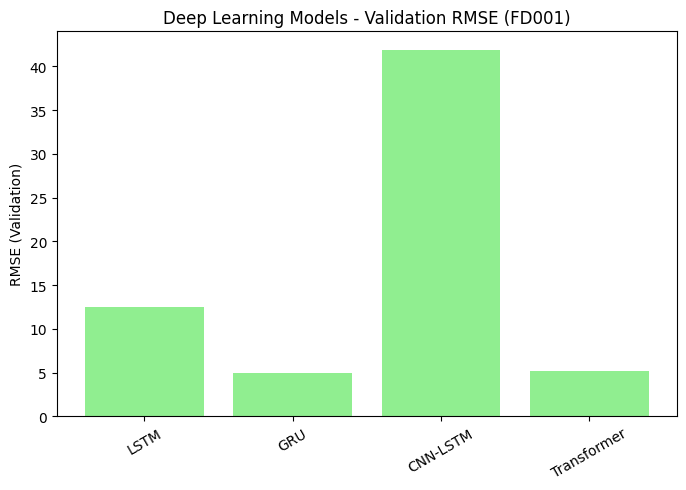

In [6]:
# 06_results_summary.ipynb

# =========================
# Imports
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import os

# =========================
# Load results
# =========================
results_dir = "../results/"

# Baselines (only test RMSE/MAE/R2 available)
df_baseline = pd.read_csv(os.path.join(results_dir, "baseline_fd001.csv"))
df_baseline = df_baseline.rename_axis("Model").reset_index()
df_baseline["RMSE_val"] = None
df_baseline["MAE_val"] = None
df_baseline["R2_val"] = None
df_baseline = df_baseline.rename(columns={"RMSE":"RMSE_test", "MAE":"MAE_test", "R2":"R2_test"})

# Deep learning models
df_lstm = pd.read_csv(os.path.join(results_dir, "lstm_fd001_results.csv"))
df_gru = pd.read_csv(os.path.join(results_dir, "gru_fd001_results.csv"))
df_cnnlstm = pd.read_csv(os.path.join(results_dir, "cnnlstm_fd001_results.csv"))
df_transformer = pd.read_csv(os.path.join(results_dir, "transformer_fd001_results.csv"))  # NEW

# Combine all
df_all = pd.concat(
    [df_baseline, df_lstm, df_gru, df_cnnlstm, df_transformer], 
    ignore_index=True
)

# Save combined table
df_all.to_csv(os.path.join(results_dir, "summary_fd001.csv"), index=False)

print("✅ Combined results saved to summary_fd001.csv")
display(df_all)

# =========================
# Ensure metrics are numeric
# =========================
for col in ["RMSE_val","MAE_val","R2_val","RMSE_test","MAE_test","R2_test"]:
    df_all[col] = pd.to_numeric(df_all[col], errors="coerce")

# =========================
# Option 1: Vertical Bars
# =========================
# Test RMSE
plt.figure(figsize=(8,5))
plt.bar(range(len(df_all)), df_all["RMSE_test"], color="skyblue")
plt.xticks(range(len(df_all)), df_all["Model"], rotation=30)
plt.ylabel("RMSE (Test)")
plt.title("Model Comparison on FD001 Test Set")
plt.show()

# Validation RMSE (DL models only)
df_val = df_all.dropna(subset=["RMSE_val"])
plt.figure(figsize=(8,5))
plt.bar(range(len(df_val)), df_val["RMSE_val"], color="lightgreen")
plt.xticks(range(len(df_val)), df_val["Model"], rotation=30)
plt.ylabel("RMSE (Validation)")
plt.title("Deep Learning Models - Validation RMSE (FD001)")
plt.show()
